In [1]:
import pickle

import altair as alt

import pandas as pd

import polyclonal

import yaml

In [2]:
import dms_variants
import dms_variants.codonvarianttable
from dms_variants.constants import CBPALETTE
import dms_variants.plotnine_themes

from plotnine import *

_ = theme_set(dms_variants.plotnine_themes.theme_graygrid())


In [3]:
import os
os.chdir('../../')

In [4]:
prob_escape_libA_csv = "results/prob_escape/libA_221108_1_1C04-5G04_1_prob_escape.csv"

prob_escape_libA = pd.read_csv(
    prob_escape_libA_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_libA.notnull().all().all()

In [5]:
prob_escape_libB_csv = "results/prob_escape/libB_221108_1_1C04-5G04_1_prob_escape.csv"

prob_escape_libB = pd.read_csv(
    prob_escape_libB_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_libB.notnull().all().all()

In [6]:
import re
pat = r'[A-Z]10[0|1|2][A-Z]'

In [7]:
display(
    prob_escape_libB.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
1.37,28219
2.05,28219
3.08,28219
4.62,28219
6.93,28219
10.40,28219


In [8]:
libB_1c04 = prob_escape_libB[prob_escape_libB.aa_substitutions_sequential.str.contains(pat)]
libB_1c04 = libB_1c04.loc[libB_1c04['prob_escape'] >0.1]
libB_1c04.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
430875,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101V I255M,2,TGGTAATAGGAGTGGG,1.0000,1.0118,89,19,16152,3489,9397483,19,K82V I236M,1C04-5G04,1.37
428841,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101T S212F,2,TTATAGCCTTGTGTTG,1.0000,1.2401,155,27,16152,3489,9397483,19,K82T S193F,1C04-5G04,1.37
428922,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N27S E69V K102E P122S K469N,5,CTACGAAAATTTTTCA,1.0000,1.4826,151,22,16152,3489,9397483,19,N8S E50V K83E P103S K450N,1C04-5G04,1.37
341347,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K101T R280T,2,AATAATCAAACACGGC,1.0000,1.0121,908,35,89435,3489,9397483,19,K82T R261T,1C04-5G04,2.05
430982,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102T T347D S377A K430L,4,AGCATAAAAACTTCAA,0.8077,0.8077,86,23,16152,3489,9397483,19,K83T T328D S358A K411L,1C04-5G04,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343519,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K101S,1,AGGATCTGAACAATAT,0.1025,0.1025,226,86,89435,3489,9397483,19,K82S,1C04-5G04,2.05
345161,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K102R R227G,2,TCGCAAATCCAGCACG,0.1025,0.1025,92,35,89435,3489,9397483,19,K83R R208G,1C04-5G04,2.05
343162,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K101E,1,CTCCTAAGATAAGGAT,0.1016,0.1016,276,106,89435,3489,9397483,19,K82E,1C04-5G04,2.05
344106,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,N100D,1,CGCGGGCCTGGGATGT,0.1016,0.1016,164,63,89435,3489,9397483,19,N81D,1C04-5G04,2.05


In [46]:
display(
    libB_1c04.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
1.37,177
2.05,37
3.08,9
4.62,2
6.93,2
10.40,1


In [78]:
libB_outlier = libB_1c04.loc[libB_1c04['antibody_concentration'] == 3.08]
libB_outlier

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
255418,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K102T N115A,2,AAATGGAGAAGCTGTG,0.1515,0.1515,12666,814,358314,3489,9397483,19,K83T N96A,1C04-5G04,3.08
255437,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,T31Y K102Q N141H I211Y K387M,5,AATAACAAATAAACAT,0.1399,0.1399,8735,608,358314,3489,9397483,19,T12Y K83Q N122H I192Y K368M,1C04-5G04,3.08
255461,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,N100D Y113T P246H L263S E363D,5,TAGGAAGCTTCTATGA,0.2117,0.2117,6610,304,358314,3489,9397483,19,N81D Y94T P227H L244S E344D,1C04-5G04,3.08
255492,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101Q N235V P246Q R380M N508F,5,TAAACACATGGTATTG,0.3462,0.3462,5369,151,358314,3489,9397483,19,K82Q N216V P227Q R361M N489F,1C04-5G04,3.08
255507,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,G24E K102R D123H S218M,4,ACCCAATTCAATGTGG,0.1939,0.1939,4839,243,358314,3489,9397483,19,G5E K83R D104H S199M,1C04-5G04,3.08
255582,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,T43A K101A D209A W253F,4,TATAGGTATAATAAAA,0.5778,0.5778,3323,56,358314,3489,9397483,19,T24A K82A D190A W234F,1C04-5G04,3.08
255713,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101A E299V Q520F,3,GTTGTCCAAAGTAATC,0.1026,0.1026,2244,213,358314,3489,9397483,19,K82A E280V Q501F,1C04-5G04,3.08
255854,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101R L183I E363D,3,TAAAAAAACGTAGAAA,0.1487,0.1487,1619,106,358314,3489,9397483,19,K82R L164I E344D,1C04-5G04,3.08
256257,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K102H,1,CTGCCAACGAAAATGC,0.1694,0.1694,696,40,358314,3489,9397483,19,K83H,1C04-5G04,3.08


In [67]:
libB_var = prob_escape_libB.loc[prob_escape_libB['barcode'] == 'GTTCAATAGAACCGAC']
libB_var = libB_var[['aa_substitutions_sequential', 'barcode', 'prob_escape', 'antibody_count', 'no-antibody_count', 'antibody_concentration']]
libB_var.sort_values('antibody_concentration')

,aa_substitutions_sequential,barcode,prob_escape,antibody_count,no-antibody_count,antibody_concentration
428149,P40S K102N S164K,GTTCAATAGAACCGAC,0.6615,196,64,1.37
344520,P40S K102N S164K,GTTCAATAGAACCGAC,0.0799,131,64,2.05
256609,P40S K102N S164K,GTTCAATAGAACCGAC,0.0557,366,64,3.08
170291,P40S K102N S164K,GTTCAATAGAACCGAC,0.4153,5996,64,4.62
98497,P40S K102N S164K,GTTCAATAGAACCGAC,0.0013,15,64,6.93
8583,P40S K102N S164K,GTTCAATAGAACCGAC,0.0021,38,64,10.40


In [8]:
pat_both = r'[A-Z]246[A-Z]'

libB_both = libB_1c04[libB_1c04.aa_substitutions_sequential.str.contains(pat_both)]
libB_both = libB_both.loc[libB_both['antibody_count'] != 0]
libB_both.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
431741,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102W N235E P246I K278R,4,TCCAAAATAGAAAGTG,0.5982,0.5982,72,26,16152,3489,9397483,19,K83W N216E P227I K259R,1C04-5G04,1.37
426222,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N100D Y113T P246H L263S E363D,5,TAGGAAGCTTCTATGA,0.5230,0.5230,736,304,16152,3489,9397483,19,N81D Y94T P227H L244S E344D,1C04-5G04,1.37
340660,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,N100D Y113T P246H L263S E363D,5,TAGGAAGCTTCTATGA,0.4199,0.4199,3272,304,89435,3489,9397483,19,N81D Y94T P227H L244S E344D,1C04-5G04,2.05
170268,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,N100D Y113T P246H L263S E363D,5,TAGGAAGCTTCTATGA,0.4183,0.4183,28682,304,787005,3489,9397483,19,N81D Y94T P227H L244S E344D,1C04-5G04,4.62
255492,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101Q N235V P246Q R380M N508F,5,TAAACACATGGTATTG,0.3462,0.3462,5369,151,358314,3489,9397483,19,K82Q N216V P227Q R361M N489F,1C04-5G04,3.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362878,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,N57A K102S N141P G161S S163Y Y178M T179S P246H...,11,AAGCCAAAAAACGTGA,0.0004,0.0004,1,93,89435,3489,9397483,19,N38A K83S N122P G142S S144Y Y159M T160S P227H ...,1C04-5G04,2.05
9391,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N100D Y113T P246H L263S E363D,5,TAGGAAGCTTCTATGA,0.0004,0.0004,34,304,984817,3489,9397483,19,N81D Y94T P227H L244S E344D,1C04-5G04,10.40
288727,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,Q63T N100G S212L Q216R P246V R280Q G405K Q473T,8,AAAAGAACAAACAATA,0.0004,0.0004,1,24,358314,3489,9397483,19,Q44T N81G S193L Q197R P227V R261Q G386K Q454T,1C04-5G04,3.08
33999,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,S73M K102R P246H E409T K436T,5,GTTAACCCCTAGAGCT,0.0003,0.0003,2,24,984817,3489,9397483,19,S54M K83R P227H E390T K417T,1C04-5G04,10.40


In [9]:
libA_1c04 = prob_escape_libA[prob_escape_libA.aa_substitutions_sequential.str.contains(pat)]
libA_1c04 = libA_1c04.loc[libA_1c04['prob_escape'] > 0.1]
libA_1c04.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
199754,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101V T150K D207N Y321F,4,CCACCGTTATATATAA,1.0000,3.8809,13106,29,715813,6147,10886757,22,K82V T131K D188N Y302F,1C04-5G04,3.08
333965,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N27H S65K N100D K487F,4,CCAAGCACACGTTTTC,1.0000,2.0105,805,36,68369,6147,10886757,22,N8H S46K N81D K468F,1C04-5G04,1.37
334468,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,T49Q K102T,2,CCCAATCAACCCTTTA,1.0000,1.4485,580,36,68369,6147,10886757,22,T30Q K83T,1C04-5G04,1.37
335308,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101R S281M K345S I393M,4,ATGTAGTTCCCTAACA,1.0000,1.1688,377,29,68369,6147,10886757,22,K82R S262M K326S I374M,1C04-5G04,1.37
335321,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101T,1,CAAATAGAATTTAGCA,1.0000,1.2487,375,27,68369,6147,10886757,22,K82T,1C04-5G04,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199857,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K102T Q216H N508K,3,CTGTTCAGAGATAACG,0.1018,0.1018,1932,163,715813,6147,10886757,22,K83T Q197H N489K,1C04-5G04,3.08
334925,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N100D S298R F411Y,3,TAACCCAGCCACGGAG,0.1010,0.1010,457,407,68369,6147,10886757,22,N81D S279R F392Y,1C04-5G04,1.37
333527,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N100D V366F,2,TAGGCATTATGTAGAA,0.1009,0.1009,1258,1121,68369,6147,10886757,22,N81D V347F,1C04-5G04,1.37
334975,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,I67W K101A Q216K R280V,4,AAAATGTGCCAAAACA,0.1008,0.1008,444,396,68369,6147,10886757,22,I48W K82A Q197K R261V,1C04-5G04,1.37


In [10]:
display(
    libA_1c04.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
1.37,153
2.05,36
3.08,9
4.62,1


In [75]:
libA_outlier = libA_1c04.loc[libA_1c04['antibody_concentration'] == 3.08]
libA_outlier

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
199754,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101V T150K D207N Y321F,4,CCACCGTTATATATAA,1.0000,3.8809,13106,29,715813,6147,10886757,22,K82V T131K D188N Y302F,1C04-5G04,3.08
199755,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101T,1,ATAAAATGCTTTTTTC,0.2189,0.2189,10656,418,715813,6147,10886757,22,K82T,1C04-5G04,3.08
199771,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,N100G S163D N235E N408T,4,TGAATATAGGAAGAAG,0.3600,0.3600,6750,161,715813,6147,10886757,22,N81G S144D N216E N389T,1C04-5G04,3.08
199775,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101E N141S,2,ATCCTAAAAATTTAAC,0.2741,0.2741,6575,206,715813,6147,10886757,22,K82E N122S,1C04-5G04,3.08
199851,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101E V232A S266A Q395T,4,TAGAGCTAATTATGTT,0.3318,0.3318,2048,53,715813,6147,10886757,22,K82E V213A S247A Q376T,1C04-5G04,3.08
199854,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101E Y178D K387D,3,GGACATCCTTTCGTTA,0.2117,0.2117,1997,81,715813,6147,10886757,22,K82E Y159D K368D,1C04-5G04,3.08
199857,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K102T Q216H N508K,3,CTGTTCAGAGATAACG,0.1018,0.1018,1932,163,715813,6147,10886757,22,K83T Q197H N489K,1C04-5G04,3.08
199877,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101S N464Q A495Q,3,GCACCACTATACCCTG,0.1237,0.1237,1599,111,715813,6147,10886757,22,K82S N445Q A476Q,1C04-5G04,3.08
199886,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101T,1,TTAGAATGGTAACCAA,0.2660,0.2660,1425,46,715813,6147,10886757,22,K82T,1C04-5G04,3.08


In [74]:
libA_var = prob_escape_libA.loc[prob_escape_libA['barcode'] == 'ACGACTGTAAGGGAGT']
libA_var = libA_var[['aa_substitutions_sequential', 'barcode', 'prob_escape', 'antibody_count', 'no-antibody_count', 'antibody_concentration']]
libA_var.sort_values('antibody_concentration')

,aa_substitutions_sequential,barcode,prob_escape,antibody_count,no-antibody_count,antibody_concentration
336465,K101S K190F G205P S298L K345Y,ACGACTGTAAGGGAGT,0.3405,231,61,1.37
267102,K101S K190F G205P S298L K345Y,ACGACTGTAAGGGAGT,0.4174,1231,61,2.05
200287,K101S K190F G205P S298L K345Y,ACGACTGTAAGGGAGT,0.0541,384,61,3.08
133219,K101S K190F G205P S298L K345Y,ACGACTGTAAGGGAGT,0.2828,2096,61,4.62
83107,K101S K190F G205P S298L K345Y,ACGACTGTAAGGGAGT,0.0013,14,61,6.93
20662,K101S K190F G205P S298L K345Y,ACGACTGTAAGGGAGT,0.0010,9,61,10.40


In [10]:
pat_both = r'[A-Z]246[A-Z]'

libA_both = libA_1c04[libA_1c04.aa_substitutions_sequential.str.contains(pat_both)]
libA_both.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
335533,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102F K140E S212R P246D S377T,5,AGGGAAAAGAGAATAA,0.9044,0.9044,342,34,68369,6147,10886757,22,K83F K121E S193R P227D S358T,1C04-5G04,1.37
266906,libA,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K102S P246G,2,GCCAACATAAGGCCAC,0.6517,0.6517,1796,57,297196,6147,10886757,22,K83S P227G,1C04-5G04,2.05
334389,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101A P246H I358L Q395K,4,TAAGTGTTTTATGTAA,0.6094,0.6094,610,90,68369,6147,10886757,22,K82A P227H I339L Q376K,1C04-5G04,1.37
336355,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102S P246G,2,GCCAACATAAGGCCAC,0.3817,0.3817,242,57,68369,6147,10886757,22,K83S P227G,1C04-5G04,1.37
336124,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101A P246S,2,GACAATGCGTTTTGTT,0.2194,0.2194,266,109,68369,6147,10886757,22,K82A P227S,1C04-5G04,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347613,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N100D L176K K208Q P246I Q375Y K465N,6,GGTGACTTCAATATCT,0.0003,0.0003,2,710,68369,6147,10886757,22,N81D L157K K189Q P227I Q356Y K446N,1C04-5G04,1.37
284508,libA,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K101T R111D T150F P246N G405* K469M,6,CACTACCTCGCAGAGA,0.0002,0.0002,3,323,297196,6147,10886757,22,K82T R92D T131F P227N G386* K450M,1C04-5G04,2.05
84638,libA,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,K101T R111D T150F P246N G405* K469M,6,CACTACCTCGCAGAGA,0.0002,0.0002,12,323,1124297,6147,10886757,22,K82T R92D T131F P227N G386* K450M,1C04-5G04,6.93
99090,libA,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,K102S N141V Q216L P246T P308H K387R V425I,7,ATTCGTAGACAAATAA,0.0002,0.0002,1,36,1124297,6147,10886757,22,K83S N122V Q197L P227T P289H K368R V406I,1C04-5G04,6.93


In [11]:
first_epitope_var = pd.concat([libA_1c04, libB_1c04])

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 5 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: scratch_notebooks/221031_modeling-selections-test/high_prob_escape_1C04_var.pdf
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


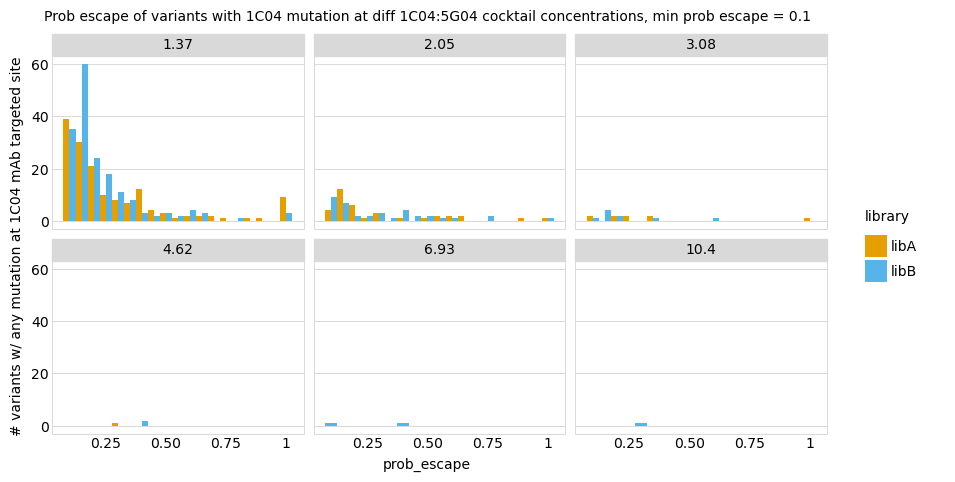

In [13]:
p = (
    ggplot(
        first_epitope_var,
        aes(x='prob_escape', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.05) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='prob_escape', 
         y='# variants w/ any mutation at 1C04 mAb targeted site',
         title='Prob escape of variants with 1C04 mutation at diff 1C04:5G04 cocktail concentrations, min prob escape = 0.1'
        )
) 

p = p + facet_wrap('~ antibody_concentration')

# p = p + facet_wrap('~ antibody_concentration', nrow = 6)
_ = p.draw()

# _ = p.draw()

p.save('scratch_notebooks/221031_modeling-selections-test/high_prob_escape_1C04_var.pdf')

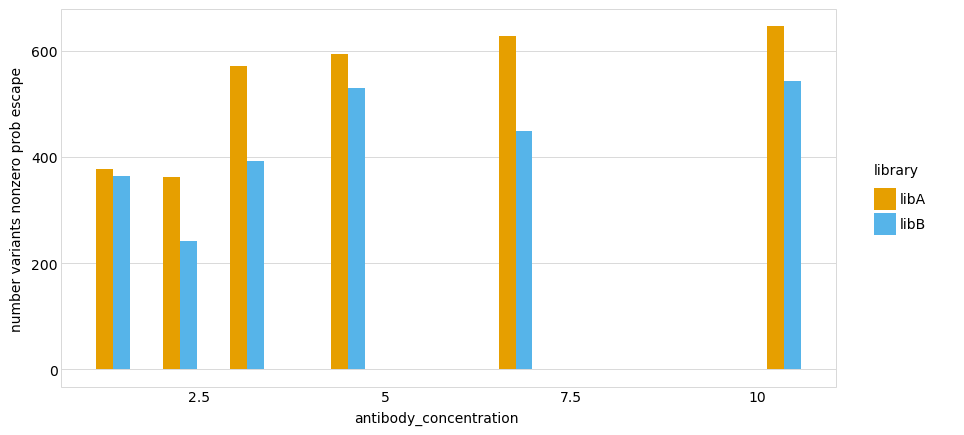

In [35]:
# first_epitope_var['antibody_concentration'] = first_epitope_var['antibody_concentration'].apply(str)

p = (
    ggplot(
        first_epitope_var,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.45) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape',
         
        )
) 

_ = p.draw()

In [16]:
libA_1c04_highAb = libA_1c04.loc[(libA_1c04['antibody_concentration'] != 1.37) &
                                 (libA_1c04['antibody_concentration'] != 2.05) &
                                 (libA_1c04['antibody_concentration'] != 3.08)]

# libA_1c04_highAb = libA_1c04[libA_1c04.antibody_concentration.astype(str).str.contains(low_ab_pat)]
# libB_both = libB_1c04[libB_1c04.aa_substitutions_sequential.str.contains(pat_both)]
libA_1c04_highAb

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
104,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101V R111T T302S,3,GTTCTAGCTGGTGGTT,0.0013,0.0013,1443,7541,889858,6147,10886757,15,K82V R92T T283S,1C04-5G04,10.40
123,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N100G K140M,2,ACTCCTTCCTATATGT,0.0011,0.0011,1280,7754,889858,6147,10886757,15,N81G K121M,1C04-5G04,10.40
125,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101A K430C,2,AAATTCGGAACCGAAT,0.0015,0.0015,1267,5812,889858,6147,10886757,15,K82A K411C,1C04-5G04,10.40
207,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101Q Q395E E462A,3,AACCTCAAAAACAAAG,0.0009,0.0009,875,7086,889858,6147,10886757,15,K82Q Q376E E443A,1C04-5G04,10.40
239,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,G24V K102S A182Y,3,GATTAGATGCAGCAAA,0.0014,0.0014,802,3857,889858,6147,10886757,15,G5V K83S A163Y,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165464,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102D A125W S143M G161D N408S,5,TACATATACTCGATAT,0.0004,0.0004,1,19,746861,6147,10886757,15,K83D A106W S124M G142D N389S,1C04-5G04,4.62
165632,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K101R K140H Y178A T179H Q330P,5,TGATATACAAAGCCTA,0.0005,0.0005,1,16,746861,6147,10886757,15,K82R K121H Y159A T160H Q311P,1C04-5G04,4.62
165684,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,T29C K102R I393S,3,TTAAGAGACAAGAAAA,0.0001,0.0001,1,71,746861,6147,10886757,15,T10C K83R I374S,1C04-5G04,4.62
165692,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102T V366T,2,TTACCTTGACAATATT,0.0005,0.0005,1,17,746861,6147,10886757,15,K83T V347T,1C04-5G04,4.62


In [18]:
libB_1c04_highAb = libB_1c04.loc[(libB_1c04['antibody_concentration'] != 1.37) &
                                 (libB_1c04['antibody_concentration'] != 2.05) &
                                 (libB_1c04['antibody_concentration'] != 3.08)]
libB_1c04_highAb

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
1,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,Q76L K101A P246S E429M,4,GTTATATAAGCGGTAA,0.2806,0.2806,12912,163,984817,3489,9397483,15,Q57L K82A P227S E410M,1C04-5G04,10.40
51,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101Q A182N V509Q,3,TCCTAATTTAGGATCG,0.0006,0.0006,2225,12589,984817,3489,9397483,15,K82Q A163N V490Q,1C04-5G04,10.40
54,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102Q D460A,2,GTGGCCCTGGGTCATC,0.0005,0.0005,2013,13011,984817,3489,9397483,15,K83Q D441A,1C04-5G04,10.40
85,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102R V366F,2,ACTCGTACAATTTCTA,0.0006,0.0006,1732,10638,984817,3489,9397483,15,K83R V347F,1C04-5G04,10.40
87,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N100D W253H,2,AGAACATGAACCATTT,0.0008,0.0008,1718,7232,984817,3489,9397483,15,N81D W234H,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210714,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,D51H K102D T206S Q216R D244T,5,TGTAACTTAACTACTT,0.0003,0.0003,1,16,787005,3489,9397483,15,D32H K83D T187S Q197R D225T,1C04-5G04,4.62
210715,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102C Y178A E191Q G294V S419P Y489H,6,TGTAATATAGTATATA,0.0003,0.0003,1,15,787005,3489,9397483,15,K83C Y159A E172Q G275V S400P Y470H,1C04-5G04,4.62
210757,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,N100D,1,TTAATAGTAGTTGTTA,0.0003,0.0003,1,16,787005,3489,9397483,15,N81D,1C04-5G04,4.62
210855,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,S28P Q63G K102T K345C,4,TTTAAGGCTGAGTGAT,0.0002,0.0002,1,20,787005,3489,9397483,15,S9P Q44G K83T K326C,1C04-5G04,4.62


In [22]:
libA_1c04_high_escape = libA_1c04_highAb.loc[libA_1c04_highAb['prob_escape'] > 0.005]
libA_1c04_high_escape

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
4249,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,G42* K102Q K190N L400W K471R,5,TTCCCACCAGTTTAAT,0.0054,0.0054,83,106,889858,6147,10886757,15,G23* K83Q K171N L381W K452R,1C04-5G04,10.40
5184,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102S N464Y,2,AGAAATTGTTCTTTAA,0.0056,0.0056,68,84,889858,6147,10886757,15,K83S N445Y,1C04-5G04,10.40
6275,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,R52Q K101R S143E I261V R326K E422Q E462A,7,AGGCGGAATAAGAACA,0.0054,0.0054,55,70,889858,6147,10886757,15,R33Q K82R S124E I242V R307K E403Q E443A,1C04-5G04,10.40
6441,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101N R220V D394N K522N,4,TCAAGTCAGCGTTTCT,0.0054,0.0054,54,69,889858,6147,10886757,15,K82N R201V D375N K503N,1C04-5G04,10.40
6555,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101A K190V R241I L450M,4,TAATACAAAGAAGGCT,0.0051,0.0051,53,72,889858,6147,10886757,15,K82A K171V R222I L431M,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150513,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K101T I211Y A323D L386W D394A,5,TTGCATAAAGTGTGCT,0.0055,0.0055,12,18,746861,6147,10886757,15,K82T I192Y A304D L367W D375A,1C04-5G04,4.62
150516,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,I48M K102N K140Q L183I K329N G405D Y431M I456L,8,TTGCTGATTATAGTTA,0.0055,0.0055,12,18,746861,6147,10886757,15,I29M K83N K121Q L164I K310N G386D Y412M I437L,1C04-5G04,4.62
151339,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102T Y113S Y178N T179K,4,TTTTCGTTTTAAACAA,0.0060,0.0060,11,15,746861,6147,10886757,15,K83T Y94S Y159N T160K,1C04-5G04,4.62
152038,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102R G161* I211G N408T,4,GAAATGTACATGAACA,0.0055,0.0055,10,15,746861,6147,10886757,15,K83R G142* I192G N389T,1C04-5G04,4.62


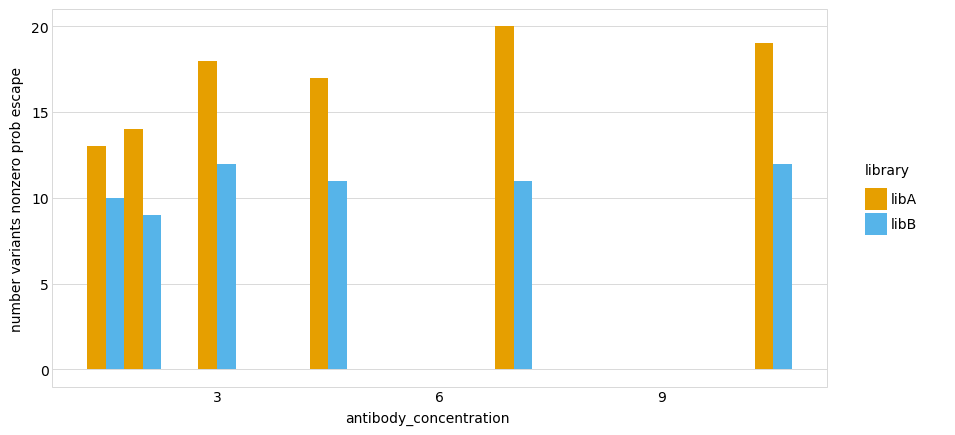

In [25]:
both_var = pd.concat([libA_both, libB_both])
p = (
    ggplot(
        both_var,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.5) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

In [14]:
libA_ab_nonzero = prob_escape_libA.loc[prob_escape_libA['prob_escape'] > 0]

libB_ab_nonzero = prob_escape_libB.loc[prob_escape_libB['prob_escape'] > 0]

nonzero_ab_var = pd.concat([libA_ab_nonzero, libB_ab_nonzero])

In [15]:
display(
    libB_ab_nonzero.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
1.37,18673
2.05,21003
3.08,26000
4.62,26776
6.93,26124
10.40,26338


In [16]:
display(
    prob_escape_libB.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
1.37,28219
2.05,28219
3.08,28219
4.62,28219
6.93,28219
10.40,28219


In [164]:
display(
    libA_ab_nonzero.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
1.37,16868
2.05,21638
3.08,23858
4.62,23915
6.93,24212
10.40,24538


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 5 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: scratch_notebooks/221031_modeling-selections-test/var_nonzero_prob_escape.pdf


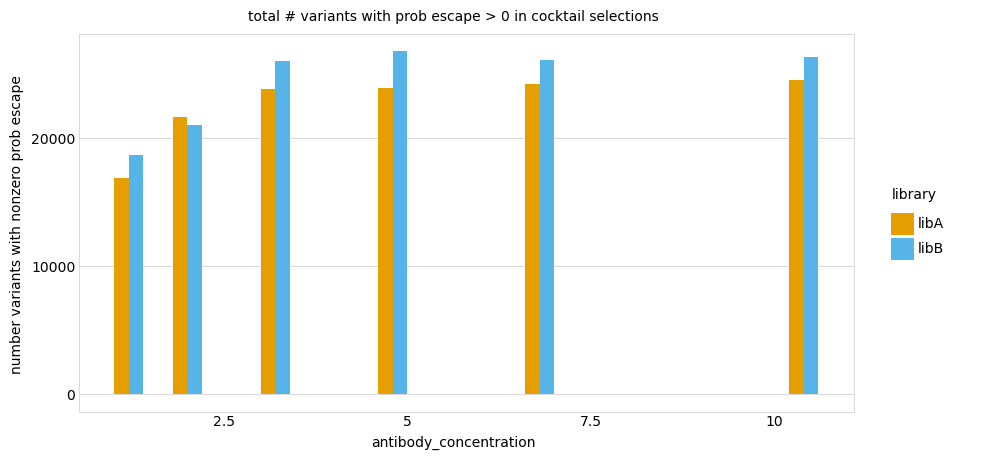

In [177]:
p = (
    ggplot(
        nonzero_ab_var,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.4) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants with nonzero prob escape',
         title='total # variants with prob escape > 0 in cocktail selections'
        )
) 

_ = p.draw()

p.save('scratch_notebooks/221031_modeling-selections-test/var_nonzero_prob_escape.pdf')

In [171]:
libA_ab_nonzero = prob_escape_libA.loc[prob_escape_libA['prob_escape'] > 0.005]

libB_ab_nonzero = prob_escape_libB.loc[prob_escape_libB['prob_escape'] > 0.005]

nonzero_ab_var = pd.concat([libA_ab_nonzero, libB_ab_nonzero])

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 5 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: scratch_notebooks/221031_modeling-selections-test/var_prob_escape_5e-3.pdf


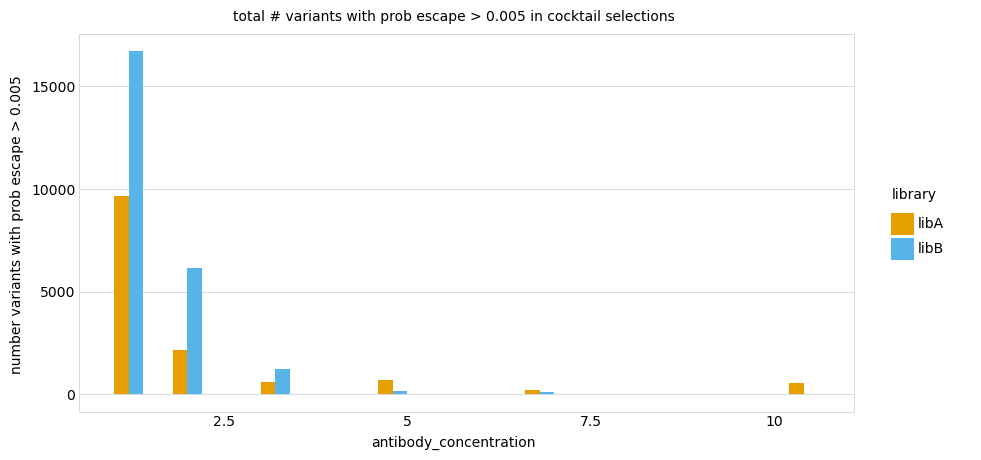

In [174]:
p = (
    ggplot(
        nonzero_ab_var,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.4) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants with prob escape > 0.005',
         title='total # variants with prob escape > 0.005 in cocktail selections'
        )
) 

_ = p.draw()

p.save('scratch_notebooks/221031_modeling-selections-test/var_prob_escape_5e-3.pdf')

In [ ]:
df[df.aa_substitutions_sequential.match(regex)]

In [33]:
prob_escape_lower_threshold = pd.read_csv(
    "scratch_notebooks/221108_pre-config-change_prob-escapes/libA_221108_1_1C04-5G04_1_prob_escape.csv",
    keep_default_na=False, na_values="nan"
).query(
    "`no-antibody_count` >= no_antibody_count_threshold"
)  # filter for those with sufficient no-antibody counts
assert prob_escape_lower_threshold.notnull().all().all()
prob_escape_lower_threshold.head()

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
0,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.0007,0.0007,25556,270456,889858,6147,10886757,15,K278I,1C04-5G04,10.4
2,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.0007,0.0007,10157,93568,889858,6147,10886757,15,R92S V347M R383S,1C04-5G04,10.4
3,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,L89I L263H Q520R,3,CTCTTTAAAATCCATT,0.0010,0.0010,8175,54917,889858,6147,10886757,15,L70I L244H Q501R,1C04-5G04,10.4
4,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K46A I301V E409M,3,AAAAATCTGAGACAAA,0.0006,0.0006,7546,80986,889858,6147,10886757,15,K27A I282V E390M,1C04-5G04,10.4
5,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,D209A,1,CCTTAGTGTAATAAAA,0.0009,0.0009,6912,55637,889858,6147,10886757,15,D190A,1C04-5G04,10.4


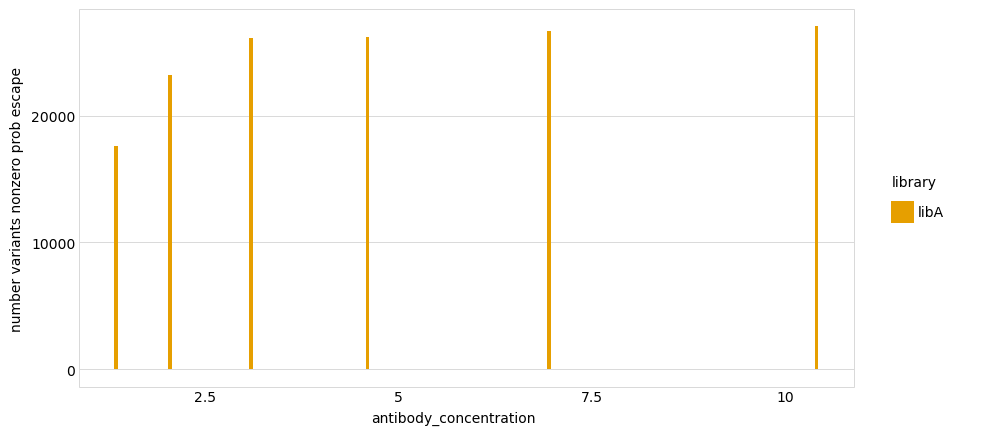

In [34]:
lower_threshold_nonzero_ab = prob_escape_lower_threshold.loc[prob_escape_lower_threshold['antibody_count'] != 0]
p = (
    ggplot(
        lower_threshold_nonzero_ab,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.05) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

In [17]:
prob_escape_old = pd.read_csv(
    "https://raw.githubusercontent.com/jbloomlab/polyclonal/main/notebooks/libA_220810_1_1C04-5G04_1_prob_escape.csv",
    keep_default_na=False, na_values="nan"
).query(
    "`no-antibody_count` >= no_antibody_count_threshold"
)  # filter for those with sufficient no-antibody counts
assert prob_escape_old.notnull().all().all()
prob_escape_old.head()

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
0,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.0017,0.0017,78972,246344,8599550,44895,10428350,15,K278I,1C04-5G04,3.65
1,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.0047,0.0047,70662,78014,8599550,44895,10428350,15,R92S V347M R383S,1C04-5G04,3.65
2,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,A125M P246H I393A G398Q F411Y,5,CTTTCAATTATGAGAC,0.0370,0.0370,57908,8163,8599550,44895,10428350,15,A106M P227H I374A G379Q F392Y,1C04-5G04,3.65
3,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,Y113M S143N S164N I307M I393Y E468Q,6,TGTATTAGCATTTTGA,0.0074,0.0074,37740,26593,8599550,44895,10428350,15,Y94M S124N S145N I288M I374Y E449Q,1C04-5G04,3.65
4,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,G237H P246H V366M,3,CCAAGGAGCACGAAAA,0.0218,0.0218,26699,6407,8599550,44895,10428350,15,G218H P227H V347M,1C04-5G04,3.65


In [40]:
old_libA_1c04 = prob_escape_old[prob_escape_old.aa_substitutions_sequential.str.contains(pat)]
old_libA_1c04 = old_libA_1c04.loc[old_libA_1c04['prob_escape'] > 0.1]
old_libA_1c04.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
354515,libA,220810_1_antibody_1C04-5G04_0.114_1,220810_1_no-antibody_control_1,K102T H175P S285T G398T,4,CCAAATGACAATCAAA,1.0000,1.2566,29,15,69072,44895,10428350,15,K83T H156P S266T G379T,1C04-5G04,0.114
347180,libA,220810_1_antibody_1C04-5G04_0.114_1,220810_1_no-antibody_control_1,K101E I159P S163E,3,CGAGACCAGCCTAGAA,1.0000,1.7874,66,24,69072,44895,10428350,15,K82E I140P S144E,1C04-5G04,0.114
353904,libA,220810_1_antibody_1C04-5G04_0.114_1,220810_1_no-antibody_control_1,G81A K102N D394H,3,CAGTTCATCGAACAAT,1.0000,1.0605,31,19,69072,44895,10428350,15,G62A K83N D375H,1C04-5G04,0.114
279254,libA,220810_1_antibody_1C04-5G04_0.228_1,220810_1_no-antibody_control_1,K101T I211R G405H,3,GCCTATGAAGGGATAT,1.0000,1.2807,78,34,80422,44895,10428350,15,K82T I192R G386H,1C04-5G04,0.228
284923,libA,220810_1_antibody_1C04-5G04_0.228_1,220810_1_no-antibody_control_1,K102S,1,AGTACGTATAGCGCAT,1.0000,1.1165,40,20,80422,44895,10428350,15,K83S,1C04-5G04,0.228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162117,libA,220810_1_antibody_1C04-5G04_0.913_1,220810_1_no-antibody_control_1,K102T Y113F,2,ATACGCTAGGGAAGAT,0.1011,0.1011,12,19,280546,44895,10428350,15,K83T Y94F,1C04-5G04,0.913
72504,libA,220810_1_antibody_1C04-5G04_1.825_1,220810_1_no-antibody_control_1,N100D,1,TGAAAGAGGGTCCCAC,0.1006,0.1006,227,105,964960,44895,10428350,15,N81D,1C04-5G04,1.825
156500,libA,220810_1_antibody_1C04-5G04_0.913_1,220810_1_no-antibody_control_1,K101S E479V,2,AATAACCACTGAAACT,0.1006,0.1006,22,35,280546,44895,10428350,15,K82S E460V,1C04-5G04,0.913
68269,libA,220810_1_antibody_1C04-5G04_1.825_1,220810_1_no-antibody_control_1,K102S V328I,2,ATACCAGGACTCTTAA,0.1005,0.1005,819,379,964960,44895,10428350,15,K83S V309I,1C04-5G04,1.825


In [41]:
display(
    old_libA_1c04.groupby("antibody_concentration").aggregate(
        n_variants=pd.NamedAgg("barcode", "nunique")
    )
)

,n_variants
antibody_concentration,
0.114,1141
0.228,1122
0.456,1049
0.913,720
1.825,158
3.650,9


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


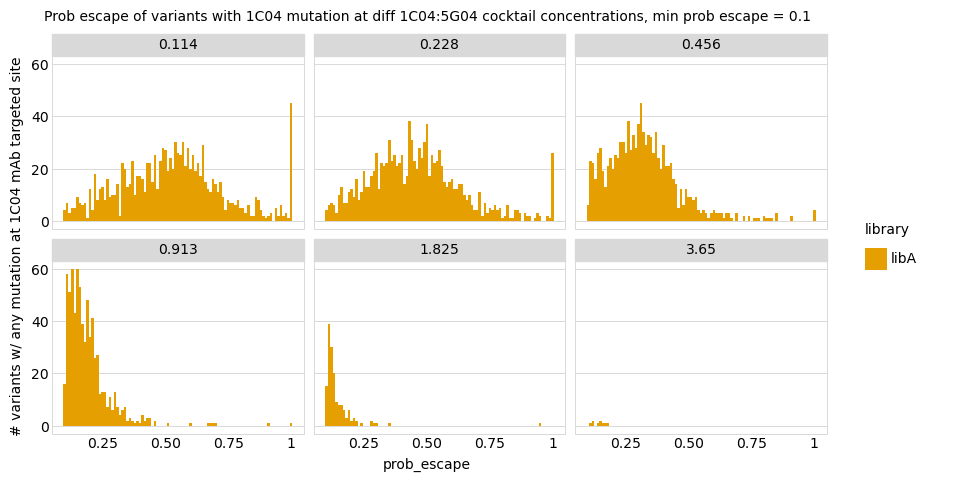

In [44]:
p = (
    ggplot(
        old_libA_1c04,
        aes(x='prob_escape', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.01) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='prob_escape', 
         y='# variants w/ any mutation at 1C04 mAb targeted site',
         title='Prob escape of variants with 1C04 mutation at diff 1C04:5G04 cocktail concentrations, min prob escape = 0.1'
        )
) 

p = p + facet_wrap('~ antibody_concentration')

# p = p + facet_wrap('~ antibody_concentration', nrow = 6)
_ = p.draw()

# _ = p.draw()

# p.save('scratch_notebooks/221031_modeling-selections-test/high_prob_escape_1C04_var.pdf')

In [42]:
libA_old_outlier = old_libA_1c04.loc[old_libA_1c04['antibody_concentration'] == 3.650]
libA_old_outlier

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
64,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,T56V K101A N235H,3,TCCAATTAGAGAGACT,0.1235,0.1235,7026,297,8599550,44895,10428350,15,T37V K82A N216H,1C04-5G04,3.65
353,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K101A P246S,2,GACAATGCGTTTTGTT,0.1189,0.1189,2141,94,8599550,44895,10428350,15,K82A P227S,1C04-5G04,3.65
435,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K102S P246G,2,GCCAACATAAGGCCAC,0.1447,0.1447,1857,67,8599550,44895,10428350,15,K83S P227G,1C04-5G04,3.65
919,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K101T Y113E E363L,3,GAGTCCTAGGTAGAAC,0.1575,0.1575,1056,35,8599550,44895,10428350,15,K82T Y94E E344L,1C04-5G04,3.65
1107,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K101S K190F G205P S298L K345Y,5,ACGACTGTAAGGGAGT,0.1715,0.1715,920,28,8599550,44895,10428350,15,K82S K171F G186P S279L K326Y,1C04-5G04,3.65
1211,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K101A F156Y I221T N235H K387Y S461Y,6,GTGGGCCGAAGAACAA,0.1072,0.1072,842,41,8599550,44895,10428350,15,K82A F137Y I202T N216H K368Y S442Y,1C04-5G04,3.65
1268,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K101E I211K S212E,3,AACGCAGCATTTGTCA,0.1460,0.1460,811,29,8599550,44895,10428350,15,K82E I192K S193E,1C04-5G04,3.65
1398,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K101A S266F,2,TCACCATGTATACTAC,0.1524,0.1524,730,25,8599550,44895,10428350,15,K82A S247F,1C04-5G04,3.65
1794,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,H75Y K101V S163E S217G V421S K465L,6,AAAATCTGATTGATCT,0.1760,0.1760,573,17,8599550,44895,10428350,15,H56Y K82V S144E S198G V402S K446L,1C04-5G04,3.65


In [43]:
old_libA_var = prob_escape_old.loc[prob_escape_old['barcode'] == 'GACAATGCGTTTTGTT']
old_libA_var = old_libA_var[['aa_substitutions_sequential', 'barcode', 'prob_escape', 'antibody_count', 'no-antibody_count', 'antibody_concentration']]
old_libA_var.sort_values('antibody_concentration')

,aa_substitutions_sequential,barcode,prob_escape,antibody_count,no-antibody_count,antibody_concentration
345593,K101A P246S,GACAATGCGTTTTGTT,0.5601,81,94,0.114
281277,K101A P246S,GACAATGCGTTTTGTT,0.3563,60,94,0.228
213771,K101A P246S,GACAATGCGTTTTGTT,0.2513,70,94,0.456
141312,K101A P246S,GACAATGCGTTTTGTT,0.2537,149,94,0.913
72025,K101A P246S,GACAATGCGTTTTGTT,0.1242,251,94,1.825
353,K101A P246S,GACAATGCGTTTTGTT,0.1189,2141,94,3.650


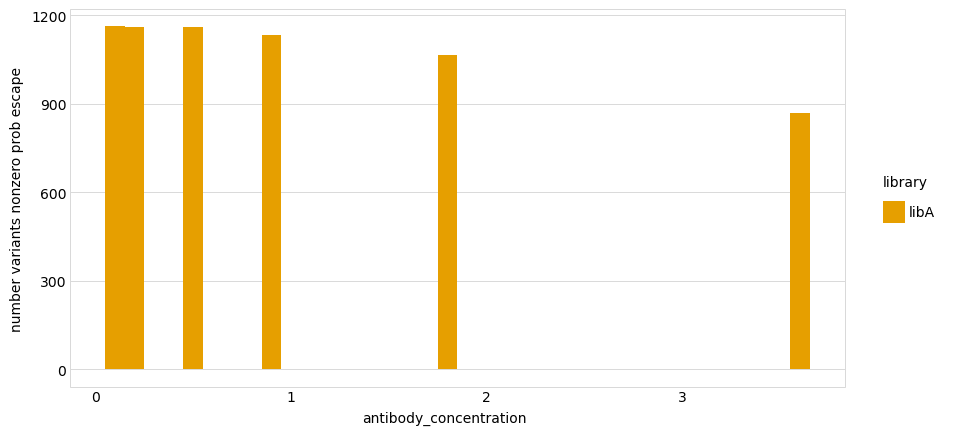

In [87]:
# old_libA_1c04['antibody_concentration'] = old_libA_1c04['antibody_concentration'].apply(str)

p = (
    ggplot(
        old_libA_1c04,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.1) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 5 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: scratch_notebooks/221031_modeling-selections-test/old_selection_var_nonzero_prob_escape.pdf


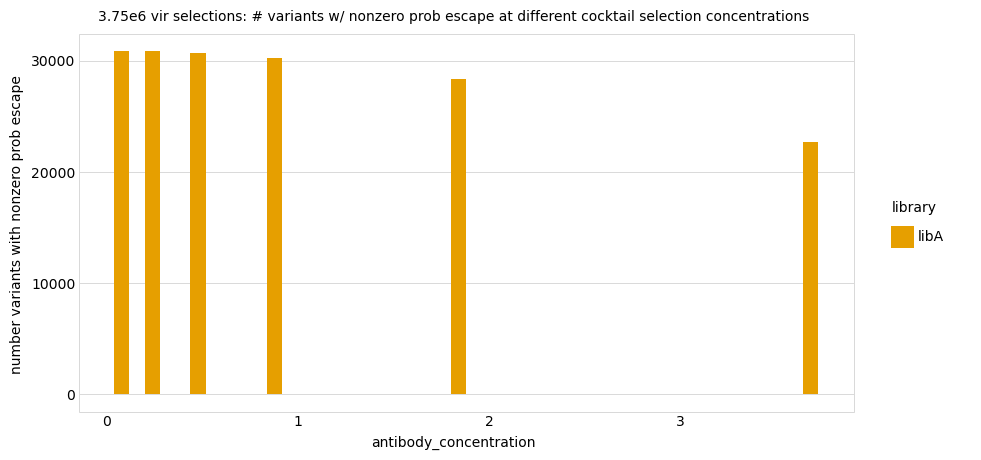

In [18]:
old_nonzero_ab = prob_escape_old.loc[prob_escape_old['prob_escape'] > 0]
p = (
    ggplot(
        old_nonzero_ab,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.08) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants with nonzero prob escape',
         title='3.75e6 vir selections: # variants w/ nonzero prob escape at different cocktail selection concentrations'
        )
) 

_ = p.draw()

p.save('scratch_notebooks/221031_modeling-selections-test/old_selection_var_nonzero_prob_escape.pdf')

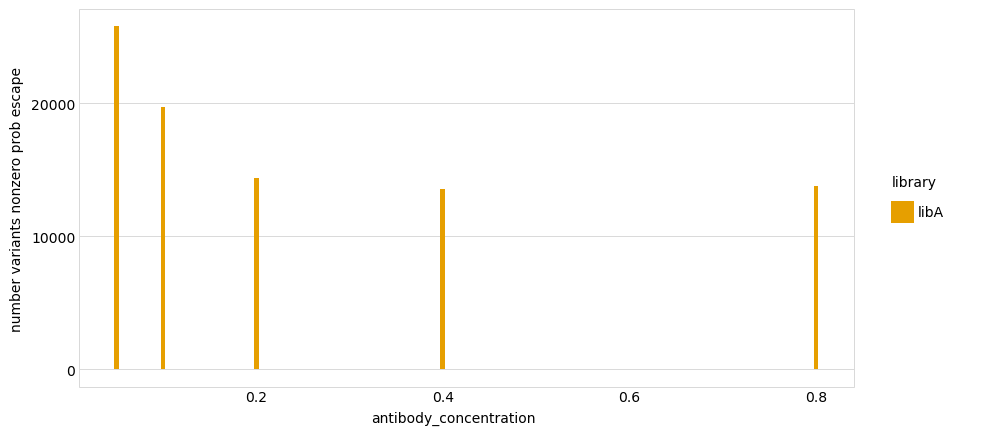

In [93]:
prob_escape_mono_csv = "results/prob_escape/libA_221021_1_1C04_1_prob_escape.csv"

prob_escape_mono = pd.read_csv(
    prob_escape_mono_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_mono.notnull().all().all()

prob_escape_mono = prob_escape_mono.loc[prob_escape_mono['antibody_count'] != 0]
p = (
    ggplot(
        prob_escape_mono,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.005) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

In [97]:
prob_escape_mono = prob_escape_mono.loc[prob_escape_mono['prob_escape'] > 0.2]

In [98]:
outlier = prob_escape_mono.loc[prob_escape_mono['antibody_concentration'] == 0.80]
outlier

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
0,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,K102T A231D T320S Q330K Q473M,5,GAAATATTTGTTAATT,0.6433,0.6433,113572,8222,619647,28860,16889978,34,K83T A212D T301S Q311K Q454M,1C04,0.8
1,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,S73Y G97D,2,GCGGAATCTCTACGCA,0.8089,0.8089,78817,4538,619647,28860,16889978,34,S54Y G78D,1C04,0.8
2,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,P23E T49R K102T S281R D460A,5,GTTTCAGTGCTGATCA,0.4632,0.4632,57759,5808,619647,28860,16889978,34,P4E T30R K83T S262R D441A,1C04,0.8
3,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,E69Q Q76M G97D V316L D394G,5,ACAAGTGACCTGATCA,0.5764,0.5764,55230,4463,619647,28860,16889978,34,E50Q Q57M G78D V297L D375G,1C04,0.8
4,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,K101A R227F M365F A495E,4,AATCCTCAGTATATTA,0.3498,0.3498,51365,6839,619647,28860,16889978,34,K82A R208F M346F A476E,1C04,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,R243W L263H,2,AATCCTATAACAGCAG,0.2758,0.2758,373,63,619647,28860,16889978,34,R224W L244H,1C04,0.8
431,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,Q330L K345R,2,GTTATCTAACCCGCAA,0.2445,0.2445,336,64,619647,28860,16889978,34,Q311L K326R,1C04,0.8
434,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,G24A K154F K387E L447A,4,TGGAGTTTAGTACTTG,0.2432,0.2432,329,63,619647,28860,16889978,34,G5A K135F K368E L428A,1C04,0.8
486,libA,221021_1_antibody_1C04_0.8_1,221021_1_no-antibody_control_1,G42* F156S,2,AAAAGTTTTGCGAATG,0.2287,0.2287,275,56,619647,28860,16889978,34,G23* F137S,1C04,0.8


In [67]:
libB_var = prob_escape_libB.loc[prob_escape_libB['barcode'] == 'GTTCAATAGAACCGAC']
libB_var = libB_var[['aa_substitutions_sequential', 'barcode', 'prob_escape', 'antibody_count', 'no-antibody_count', 'antibody_concentration']]
libB_var.sort_values('antibody_concentration')

,aa_substitutions_sequential,barcode,prob_escape,antibody_count,no-antibody_count,antibody_concentration
428149,P40S K102N S164K,GTTCAATAGAACCGAC,0.6615,196,64,1.37
344520,P40S K102N S164K,GTTCAATAGAACCGAC,0.0799,131,64,2.05
256609,P40S K102N S164K,GTTCAATAGAACCGAC,0.0557,366,64,3.08
170291,P40S K102N S164K,GTTCAATAGAACCGAC,0.4153,5996,64,4.62
98497,P40S K102N S164K,GTTCAATAGAACCGAC,0.0013,15,64,6.93
8583,P40S K102N S164K,GTTCAATAGAACCGAC,0.0021,38,64,10.40


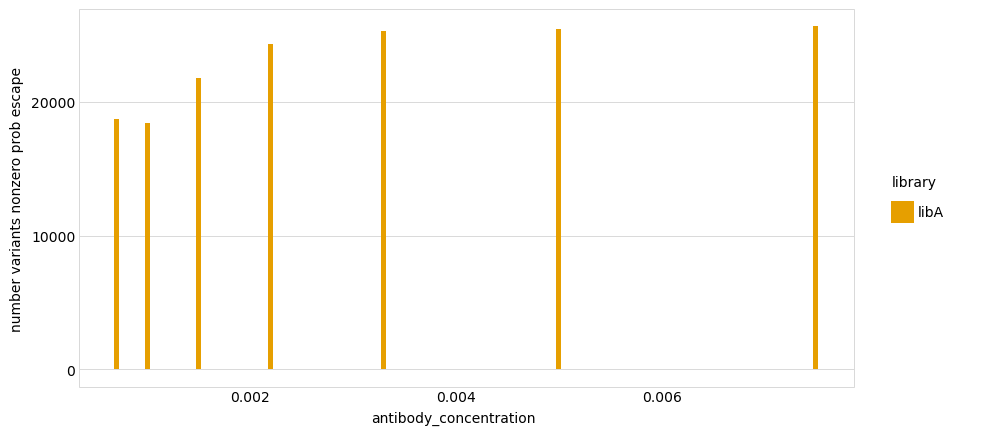

In [100]:
prob_escape_csv = "results/prob_escape/libA_221027_1_AUSAB-13_1_prob_escape.csv"

prob_escape_libA = pd.read_csv(
    prob_escape_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_libA.notnull().all().all()

prob_escape_libA = prob_escape_libA.loc[prob_escape_libA['antibody_count'] != 0]
p = (
    ggplot(
        prob_escape_libA,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.00005) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

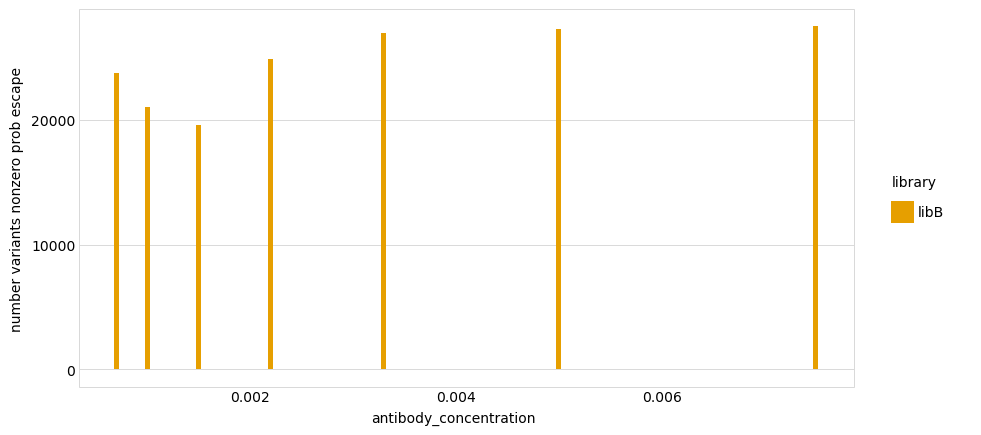

In [109]:
prob_escape_csv = "results/prob_escape/libB_221108_1_AUSAB-13_1_prob_escape.csv"

prob_escape_libB = pd.read_csv(
    prob_escape_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_libB.notnull().all().all()

prob_escape_libB = prob_escape_libB.loc[prob_escape_libB['antibody_count'] != 0]
p = (
    ggplot(
        prob_escape_libB,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.00005) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 5 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: scratch_notebooks/221031_modeling-selections-test/AUSAB-13_nonzero_selection_counts.pdf


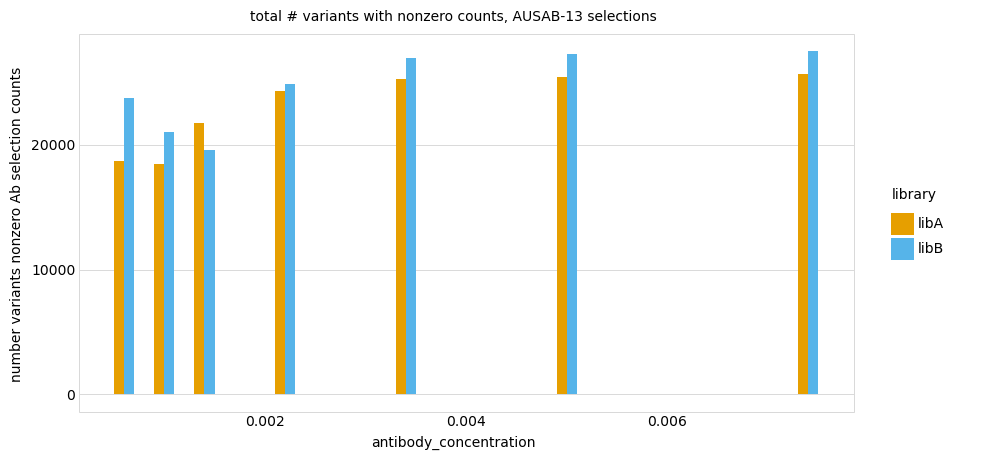

In [116]:
prob_escape = pd.concat([prob_escape_libA, prob_escape_libB])

p = (
    ggplot(
        prob_escape,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.0002) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero Ab selection counts',
         title='total # variants with nonzero counts, AUSAB-13 selections'
        )
) 

_ = p.draw()

p.save('scratch_notebooks/221031_modeling-selections-test/AUSAB-13_nonzero_selection_counts.pdf')

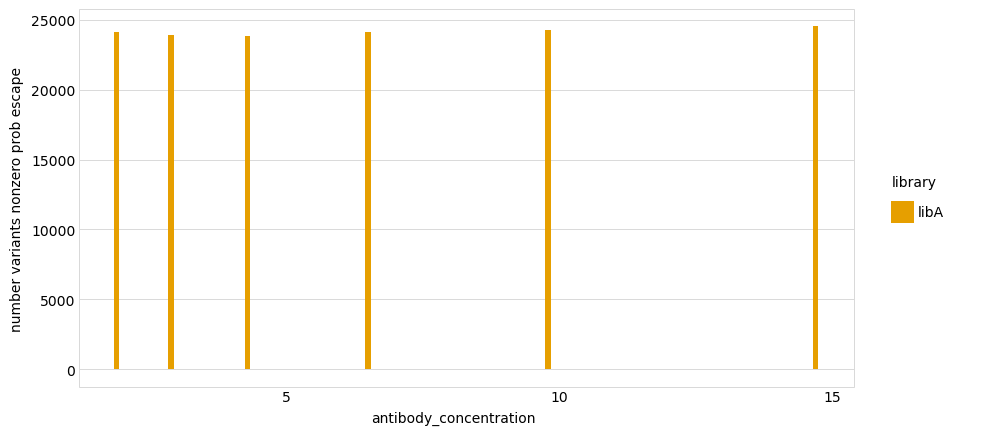

In [63]:
prob_escape_csv = "results/prob_escape/libA_221027_1_3x-1C04_5G04_1_prob_escape.csv"

prob_escape = pd.read_csv(
    prob_escape_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape.notnull().all().all()

prob_escape = prob_escape.loc[prob_escape['antibody_count'] != 0]
p = (
    ggplot(
        prob_escape,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.1) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

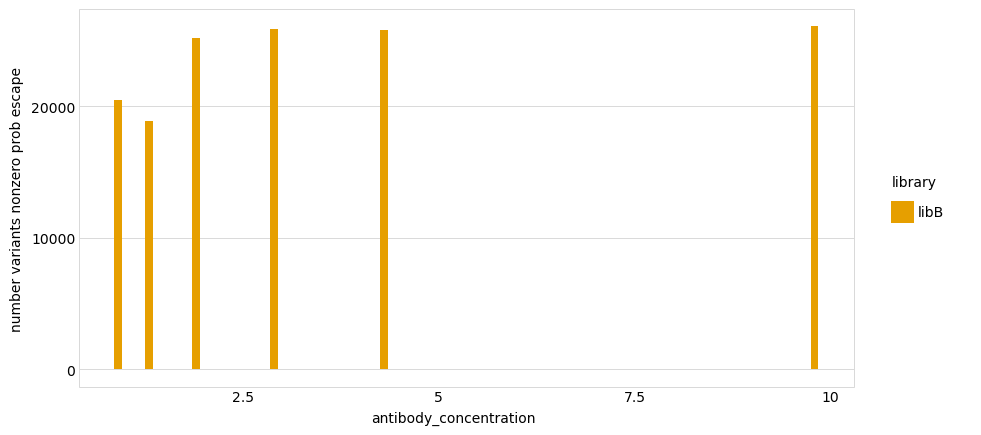

In [64]:
prob_escape_csv = "results/prob_escape/libB_221108_1_3x-1C04_5G04_1_prob_escape.csv"

prob_escape = pd.read_csv(
    prob_escape_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape.notnull().all().all()

prob_escape = prob_escape.loc[prob_escape['antibody_count'] != 0]
p = (
    ggplot(
        prob_escape,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.1) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

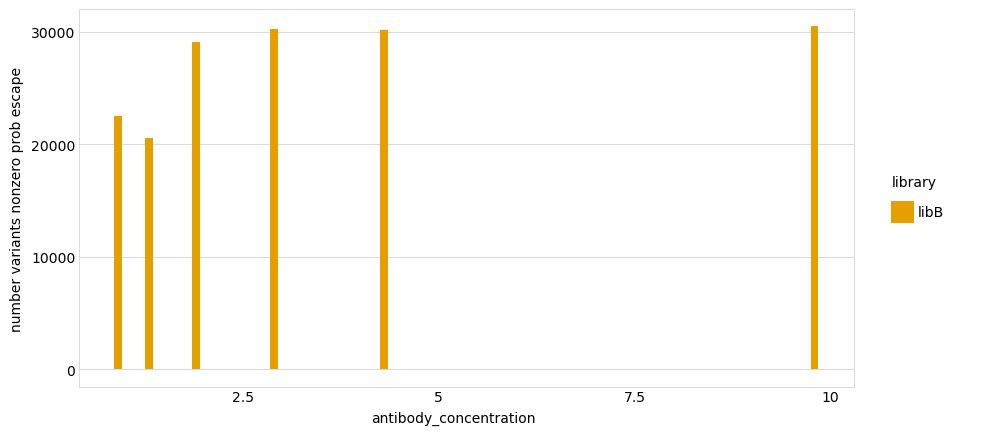

In [58]:
prob_escape_csv = "results/prob_escape/libB_221108_1_3x-1C04_5G04_1_prob_escape.csv"

prob_escape = pd.read_csv(
    prob_escape_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= 10")
assert prob_escape.notnull().all().all()

prob_escape = prob_escape.loc[prob_escape['antibody_count'] != 0]
p = (
    ggplot(
        prob_escape,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.1) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

In [7]:
cocktail_full = pd.concat([prob_escape_libA, prob_escape_libB])
cocktail_full

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
0,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.0007,0.0007,25556,270456,889858,6147,10886757,22,K278I,1C04-5G04,10.40
2,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.0007,0.0007,10157,93568,889858,6147,10886757,22,R92S V347M R383S,1C04-5G04,10.40
3,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,L89I L263H Q520R,3,CTCTTTAAAATCCATT,0.0010,0.0010,8175,54917,889858,6147,10886757,22,L70I L244H Q501R,1C04-5G04,10.40
4,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K46A I301V E409M,3,AAAAATCTGAGACAAA,0.0006,0.0006,7546,80986,889858,6147,10886757,22,K27A I282V E390M,1C04-5G04,10.40
5,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,D209A,1,CCTTAGTGTAATAAAA,0.0009,0.0009,6912,55637,889858,6147,10886757,22,D190A,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510762,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,T150Q V185M I198V S217K,4,TTTTTCGATGTGACCT,0.0000,0.0000,0,54,16152,3489,9397483,19,T131Q V166M I179V S198K,1C04-5G04,1.37
510763,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,T179G H203N R241G S377V,4,TTTTTCTAAATCGAGA,0.0000,0.0000,0,128,16152,3489,9397483,19,T160G H184N R222G S358V,1C04-5G04,1.37
510782,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,I245L S281N,2,TTTTTGGTCCAGCTTT,0.0000,0.0000,0,34,16152,3489,9397483,19,I226L S262N,1C04-5G04,1.37
510798,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,A495L,1,TTTTTTGTAAGTTTCG,0.0000,0.0000,0,39,16152,3489,9397483,19,A476L,1C04-5G04,1.37


In [12]:
# libB_1c04 = prob_escape_libB[prob_escape_libB.aa_substitutions_sequential.str.contains(pat)]

cocktail_full_1c04 = cocktail_full[cocktail_full.aa_substitutions_sequential.str.contains(pat)]

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


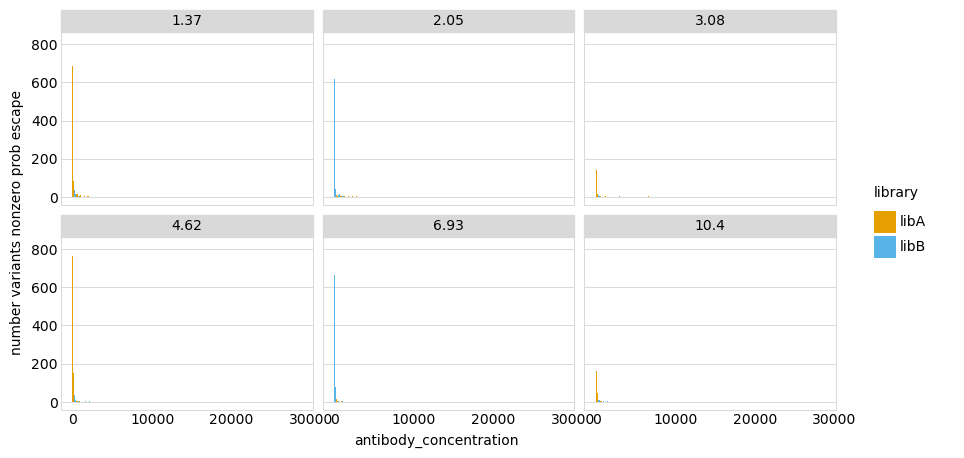

In [13]:
p = (
    ggplot(
        cocktail_full_1c04,
        aes(x='antibody_count', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=100) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_count', 
         y='number variants')
) 

p = p + facet_wrap('~ antibody_concentration')

# p = p + facet_wrap('~ antibody_concentration', nrow = 6)
_ = p.draw()

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


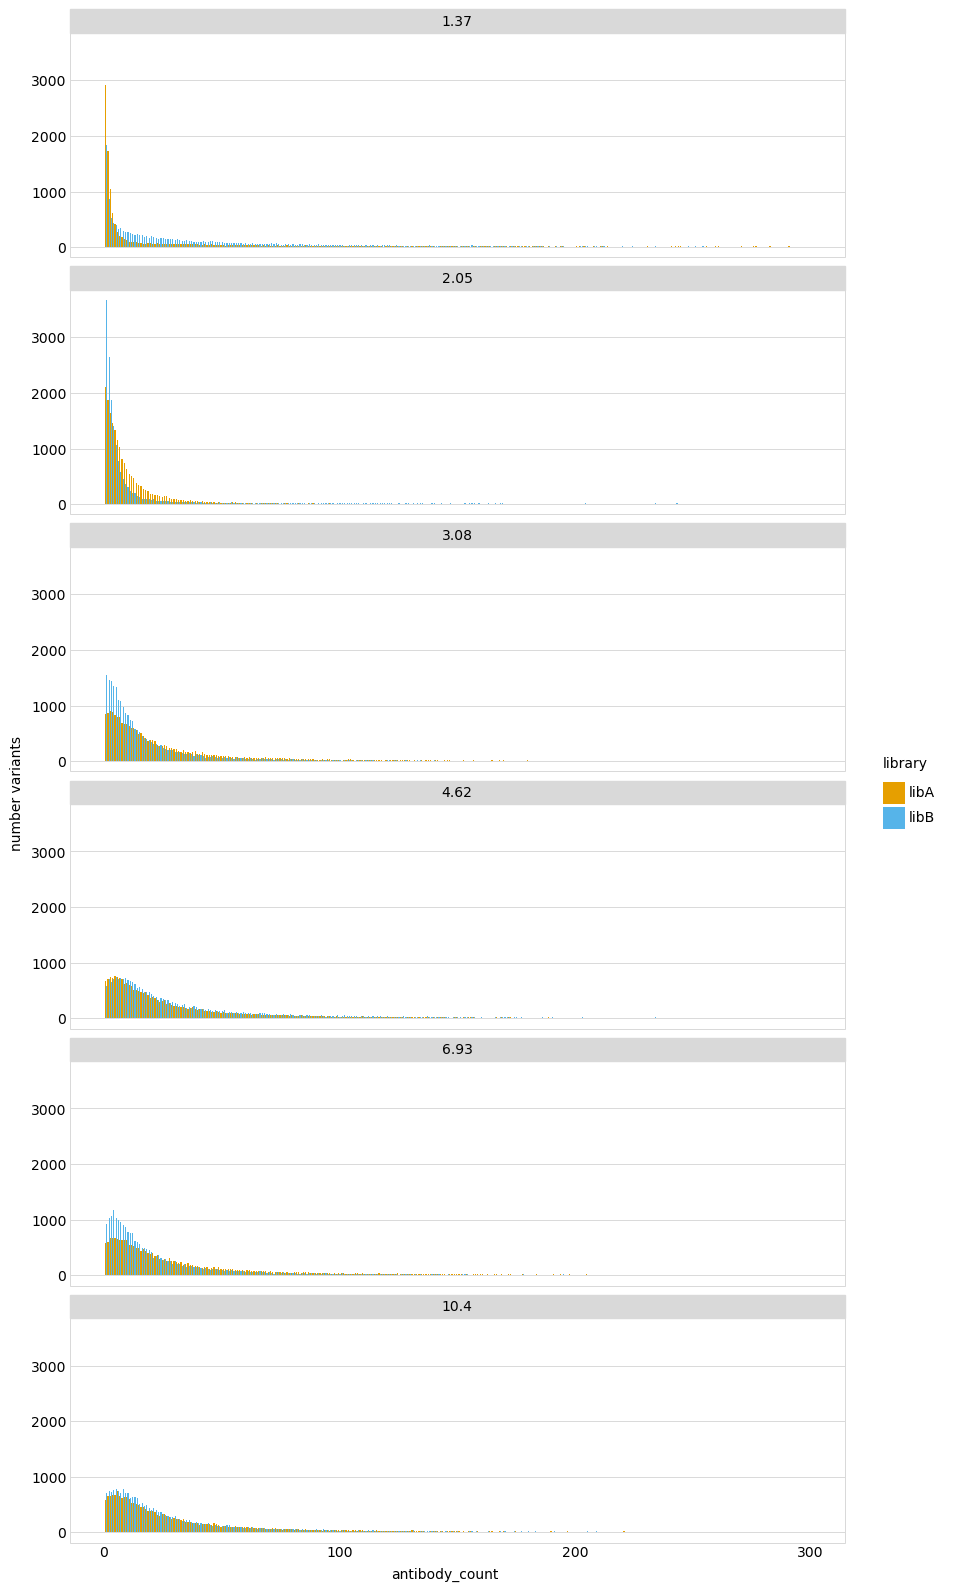

In [21]:
cocktail_full_low_counts = cocktail_full.loc[(cocktail_full['antibody_count'] < 300) &
                                             (cocktail_full['antibody_count'] > 0)
                                             
                                            ]

# cocktail_full_low_counts = cocktail_full_low_counts[cocktail_full_low]

p = (
    ggplot(
        cocktail_full_low_counts,
        aes(x='antibody_count', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=1) + 
    theme(figure_size=(10, 20),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_count', 
         y='number variants')
) 

p = p + facet_wrap('~ antibody_concentration', nrow=6)

_ = p.draw()

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


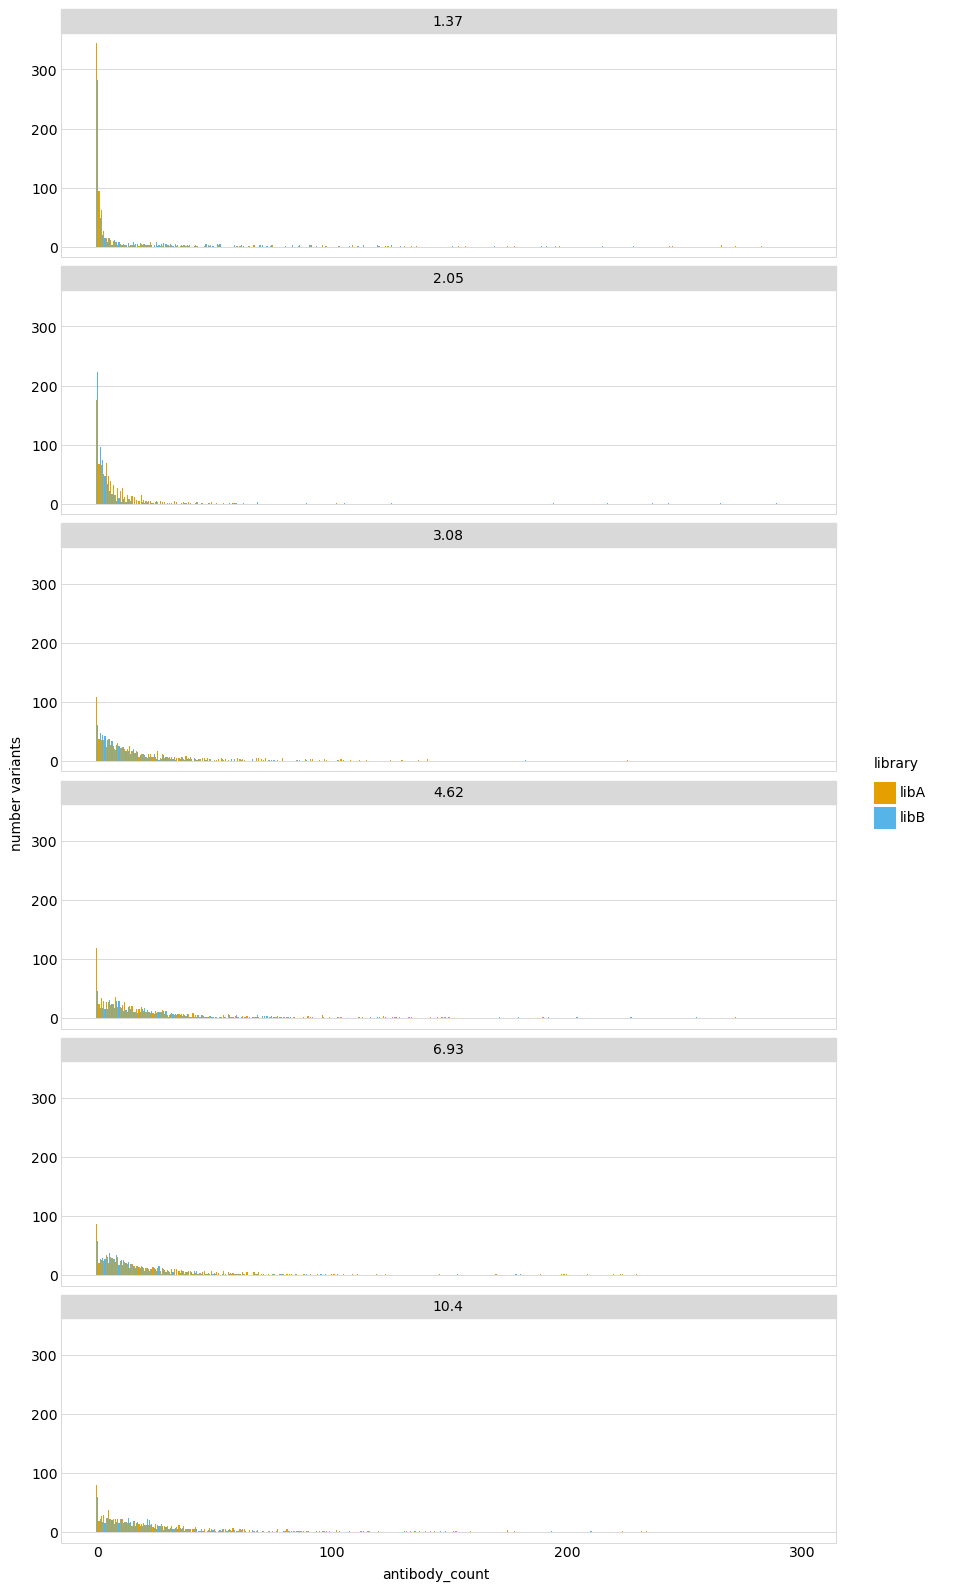

In [25]:
cocktail_full_1c04_low = cocktail_full_1c04.loc[(cocktail_full_1c04['antibody_count'] < 300)]

p = (
    ggplot(
        cocktail_full_1c04_low,
        aes(x='antibody_count', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=1) + 
    theme(figure_size=(10, 20),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_count', 
         y='number variants')
) 

p = p + facet_wrap('~ antibody_concentration', nrow=6)

_ = p.draw()

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


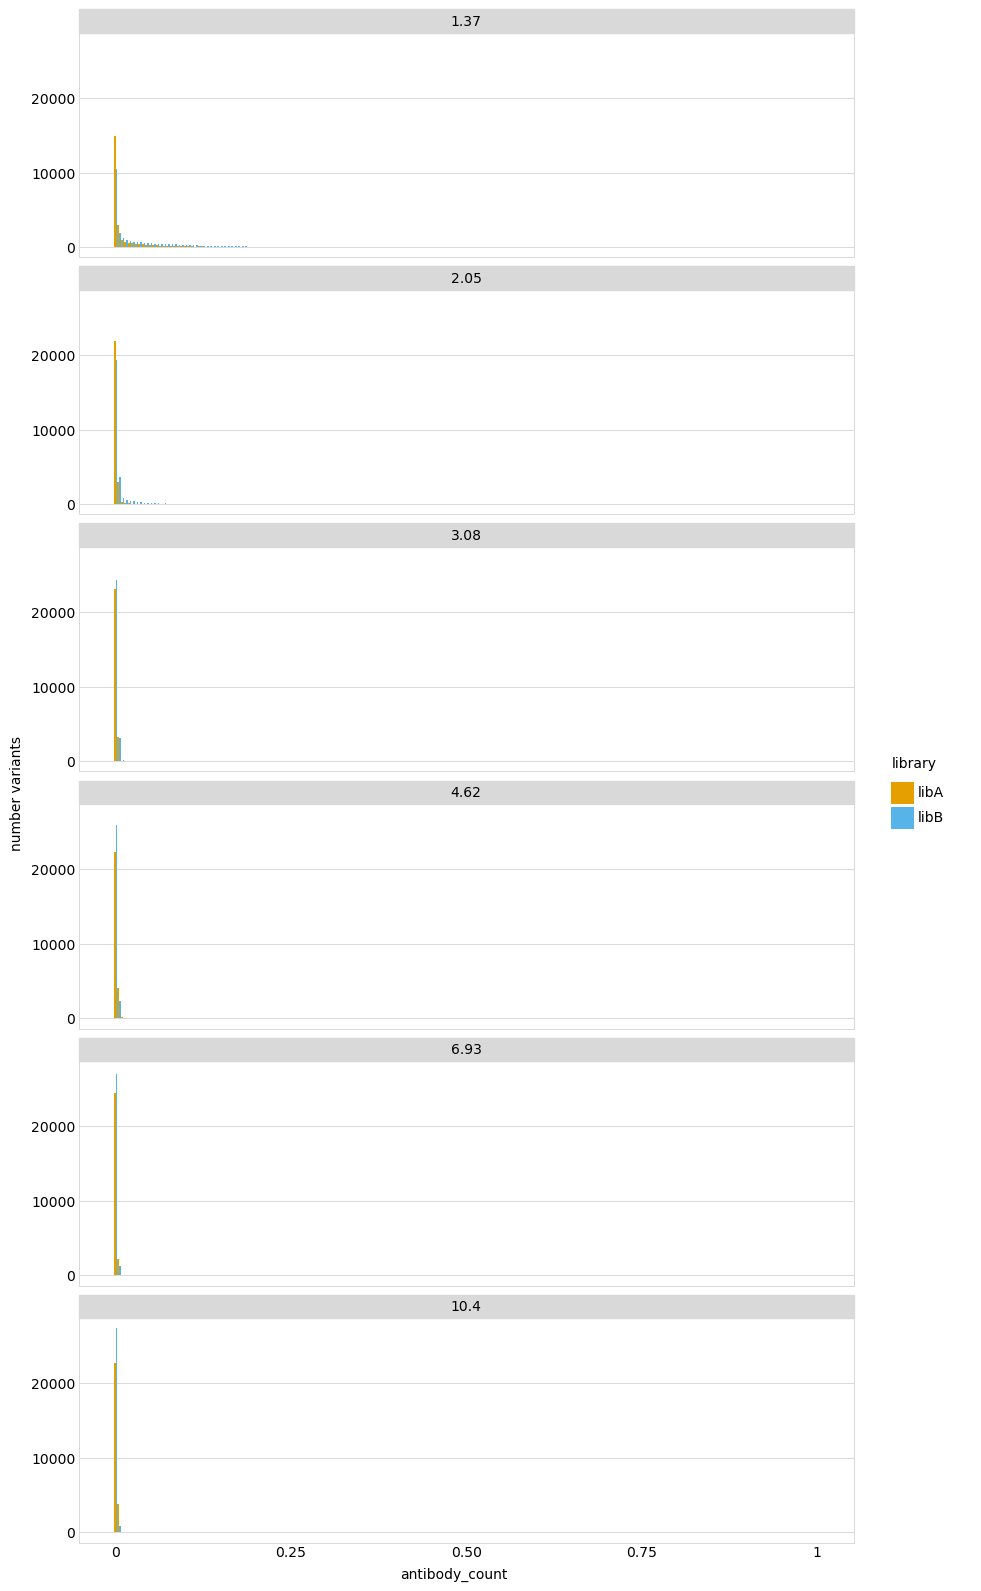

In [27]:
p = (
    ggplot(
        cocktail_full,
        aes(x='prob_escape', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.005) + 
    theme(figure_size=(10, 20),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_count', 
         y='number variants')
) 

p = p + facet_wrap('~ antibody_concentration', nrow=6)

_ = p.draw()